# ***SINGLE LAYER PERCEPTRON*** 

*Single layer perceptron is the first proposed neural model created. The content of the local memory of the neuron consists of a vector of weights. The computation of a single layer perceptron is performed over the calculation of sum of the input vector each with the value multiplied by corresponding element of vector of the weights. The value which is displayed in the output will be the input of an activation function.*

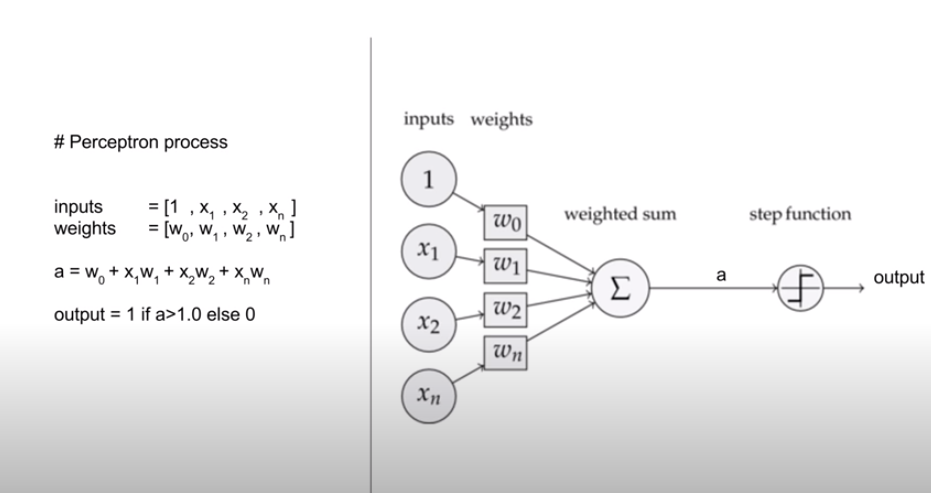

In [ ]:
#make all imports
import matplotlib,sys
from matplotlib import pyplot as plt
import numpy as np

## **Code to plot the points from the matrix:**

This code is only for the visual representation. It is not important to the logic of Single level perceptron

In [ ]:
#@title Default title text
def plot(matrix,weights=None,title="Prediction Matrix"):

	if len(matrix[0])==3: # if 1D inputs, excluding bias and ys 
		fig,ax = plt.subplots()
		ax.set_title(title)
		ax.set_xlabel("i1")
		ax.set_ylabel("Classifications")

		if weights!=None:
			y_min=-0.1
			y_max=1.1
			x_min=0.0
			x_max=1.1
			y_res=0.001
			x_res=0.001
			ys=np.arange(y_min,y_max,y_res)
			xs=np.arange(x_min,x_max,x_res)
			zs=[]
			for cur_y in np.arange(y_min,y_max,y_res):
				for cur_x in np.arange(x_min,x_max,x_res):
					zs.append(predict([1.0,cur_x],weights))
			xs,ys=np.meshgrid(xs,ys)
			zs=np.array(zs)
			zs = zs.reshape(xs.shape)
			cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)
		
		c1_data=[[],[]]
		c0_data=[[],[]]

		for i in range(len(matrix)):
			cur_i1 = matrix[i][1]
			cur_y  = matrix[i][-1]

			if cur_y==1:
				c1_data[0].append(cur_i1)
				c1_data[1].append(1.0)
			else:
				c0_data[0].append(cur_i1)
				c0_data[1].append(0.0)

		plt.xticks(np.arange(x_min,x_max,0.1))
		plt.yticks(np.arange(y_min,y_max,0.1))
		plt.xlim(0,1.05)
		plt.ylim(-0.05,1.05)

		c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
		c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

		plt.legend(fontsize=10,loc=1)
		plt.show()
		return

	if len(matrix[0])==4: # if 2D inputs, excluding bias and ys
		fig,ax = plt.subplots()
		ax.set_title(title)
		ax.set_xlabel("i1")
		ax.set_ylabel("i2")

		if weights!=None:
			map_min=0.0
			map_max=1.1
			y_res=0.001
			x_res=0.001
			ys=np.arange(map_min,map_max,y_res)
			xs=np.arange(map_min,map_max,x_res)
			zs=[]
			for cur_y in np.arange(map_min,map_max,y_res):
				for cur_x in np.arange(map_min,map_max,x_res):
					zs.append(predict([1.0,cur_x,cur_y],weights))
			xs,ys=np.meshgrid(xs,ys)
			zs=np.array(zs)
			zs = zs.reshape(xs.shape)
			cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)

		c1_data=[[],[]]
		c0_data=[[],[]]
		for i in range(len(matrix)):
			cur_i1 = matrix[i][1]
			cur_i2 = matrix[i][2]
			cur_y  = matrix[i][-1]
			if cur_y==1:
				c1_data[0].append(cur_i1)
				c1_data[1].append(cur_i2)
			else:
				c0_data[0].append(cur_i1)
				c0_data[1].append(cur_i2)

		plt.xticks(np.arange(0.0,1.1,0.1))
		plt.yticks(np.arange(0.0,1.1,0.1))
		plt.xlim(0,1.05)
		plt.ylim(0,1.05)

		c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
		c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

		plt.legend(fontsize=10,loc=1)
		plt.show()
		return
	
	print("Matrix dimensions not covered.")

## **Single Layer perceptron implementation:**

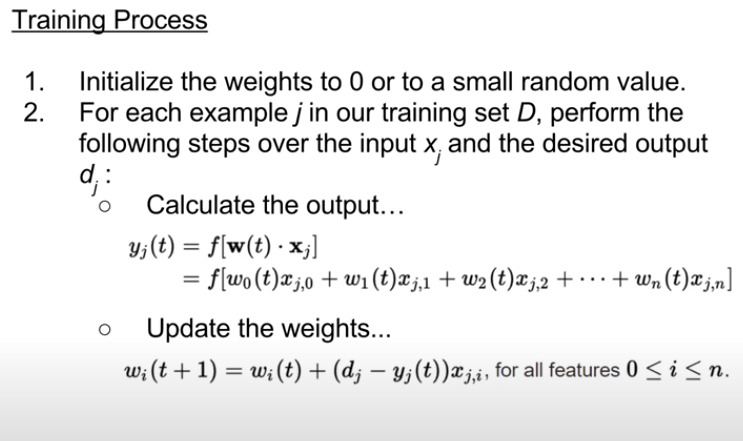

### **This is our predict function where:**


1.   We multiply the respective inputs by the weights 
2.   Put the result in activation function
3.   We get output either as 1 or 0

(Alike Logistic regression the output is either 1 or 0.)

In [ ]:
def predict(inputs,weights):
  activation_value=0.0
  for i,w in zip(inputs,weights):
    activation_value += i*w
  return 1.0 if activation_value>=0.0 else 0.0

### **This is our accuracy function where:**

*   Prediction acccuracy is calculated, given the inputs and weights


In [ ]:
# each matrix row: up to last row = inputs, last row = y (classification)
def accuracy(matrix,weights):
	correct = 0.0
	final_prediction= []
	for i in range(len(matrix)):
   
   # Get the predicted classification and store it in predictions.
		current_prediction   = predict(matrix[i][:-1],weights) 
		final_prediction.append(current_prediction)
    
    # Now if the prediction value of this iteration is equal to the 
    # given value of y, increment correct
		if current_prediction==matrix[i][-1]: correct+=1.0
    
	print("Predictions:",final_prediction)
  # Now for percent accuracy, devide coorect by the length of matrix 
	return correct/float(len(matrix))

### **This is our Train Function function where:**

*   We train the perceptron for the input data.
*   The output would be the trained weights for the given inputs.

**The arguments taken here would be:**


1.   **input matrix**
2.   **initial weights**
3.   **number of epochs**, i.e. the max iterations to train.
4.   **learning rate**, this would determine: how much we want to change our weights in each iteration. It is 1 by default.
5.   **plot_each**, if set to true, it will plot the current progress in rach epoch.
6.   **early_stop**, if we get to a 100% accuracy before completing all epochs, then this would just help in exiting the loop. True by default.
7.   **print_info**, Prints out the information for each epoch, it's true by default.







In [ ]:
# each matrix row: up to last row = inputs, last row = y (classification)
def train_weights(matrix,weights,epoch=10,learning_rate=1.00,plot_each=False,early_stop=True,verbose=True):
	# Iterate through the epochs
  for epoch in range(epoch):
    # Check the current accuracy and print it out if required.
    accuracy_current = accuracy(matrix,weights)
    print("\nEpoch %d \nWeights: "%epoch,weights)
    print("Accuracy: ",accuracy_current)

    #If we get 100% accuracy break out of the loop
    if accuracy_current==1.0 and early_stop: break

    #Plot the current information if required
    if plot_each: plot(matrix,weights,title="Epoch %d"%epoch)

    # Iterate over each training input
    for i in range(len(matrix)):
    
      # get prediction for the given input
      prediction = predict(matrix[i][:-1],weights) 
			
      #Calculating the error by subtracting from the real output.
      error      = matrix[i][-1]-prediction		
      
      #If asked for more information, provide the following.
      if verbose: sys.stdout.write("Training on data at index %d...\n"%(i))
			
      # Now iterate over each weight and update it by the value:
      # (learning_rate*error*input_to_the_given_weight)
      for j in range(len(weights)): 				 # calculate new weight for each node
        if verbose: sys.stdout.write("\tWeight[%d]: %0.5f --> "%(j,weights[j]))
        weights[j] = weights[j]+(learning_rate*error*matrix[i][j])
        if verbose: sys.stdout.write("%0.5f\n"%(weights[j]))

	#if len(matrix[0])==4: plot(matrix,weights) # if 2D inputs, excluding bias
  plot(matrix,weights,title="Final Epoch")
  return weights

### **Let's define our matrix input where:**

* Column 1 = *Bias*
* Column 2 = *x1*
* Column 3 = *x2*
* Column 4 = *y*

### **Let's define our matrix input where:**

* Column 1 = *w1*
* Column 2 = *w2*
* Column 3 = *w3*

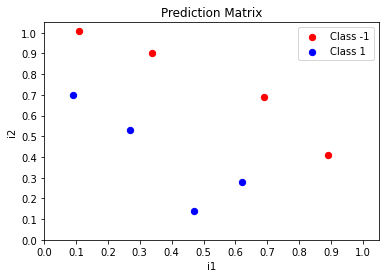

In [ ]:
matrix = [	[1.00,	0.09,	0.70,	1.0],
					[1.00,	0.11,	1.01,	0.0],
					[1.00,	0.27,	0.53,	1.0],
					[1.00,	0.34,	0.90,	0.0],
					[1.00,	0.47,	0.14,	1.0],
					[1.00,	0.62,	0.28,	1.0],
					[1.00,	0.69,	0.69,	0.0],
					[1.00,	0.89,	0.41,	0.0]]
weights = [0.20,	1.00,  -1.00]
plot(matrix)

## **RUN**

Predictions: [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.2, 1.0, -1.0]
Accuracy:  0.5
Training on data at index 0...
	Weight[0]: 0.20000 --> 1.20000
	Weight[1]: 1.00000 --> 1.09000
	Weight[2]: -1.00000 --> -0.30000
Training on data at index 1...
	Weight[0]: 1.20000 --> 0.20000
	Weight[1]: 1.09000 --> 0.98000
	Weight[2]: -0.30000 --> -1.31000
Training on data at index 2...
	Weight[0]: 0.20000 --> 1.20000
	Weight[1]: 0.98000 --> 1.25000
	Weight[2]: -1.31000 --> -0.78000
Training on data at index 3...
	Weight[0]: 1.20000 --> 0.20000
	Weight[1]: 1.25000 --> 0.91000
	Weight[2]: -0.78000 --> -1.68000
Training on data at index 4...
	Weight[0]: 0.20000 --> 0.20000
	Weight[1]: 0.91000 --> 0.91000
	Weight[2]: -1.68000 --> -1.68000
Training on data at index 5...
	Weight[0]: 0.20000 --> 0.20000
	Weight[1]: 0.91000 --> 0.91000
	Weight[2]: -1.68000 --> -1.68000
Training on data at index 6...
	Weight[0]: 0.20000 --> 0.20000
	Weight[1]: 0.91000 --> 0.91000
	Weight[2]: -1.68000 --> 

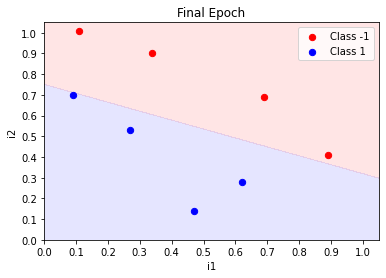

[1.2, -0.6900000000000002, -1.5999999999999999]

In [ ]:
train_weights(matrix,weights=weights)